<a href="https://colab.research.google.com/github/emekaokoye/dsn_bootcamp_2024/blob/main/Medical_QA_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

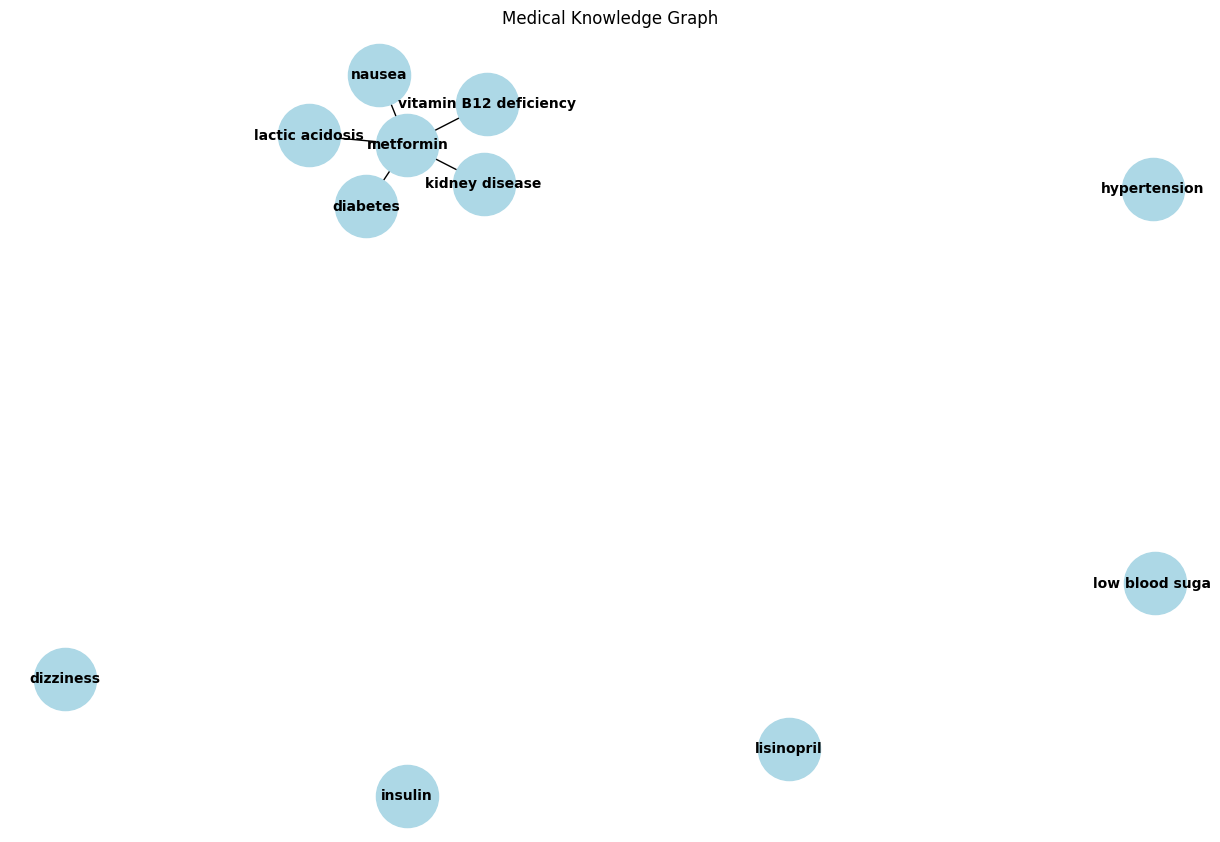


Question: What are the potential side effects of metformin for a person with kidney issues?

Generating response...

Based on the medical knowledge graph:

1. Metformin and Kidney Issues:
   - Kidney disease is a contraindication for metformin use

2. Known side effects of metformin:
   - lactic acidosis
   - vitamin B12 deficiency
   - nausea

CAUTION: This is a demonstration system. Please consult with a healthcare provider for medical advice.


In [ ]:
# Install required packages
!pip install torch torch_geometric networkx transformers pandas

import torch
import torch.nn as nn
import networkx as nx
import pandas as pd
from torch_geometric.nn import GCNConv
from transformers import AutoTokenizer, AutoModel
import matplotlib.pyplot as plt

# 1. Create a simple medical knowledge graph
class MedicalKnowledgeGraph:
    def __init__(self):
        self.graph = nx.Graph()

        # Add nodes (entities)
        medications = ['metformin', 'insulin', 'lisinopril']
        conditions = ['diabetes', 'kidney disease', 'hypertension']
        side_effects = ['lactic acidosis', 'low blood sugar', 'dizziness',
                       'nausea', 'vitamin B12 deficiency']

        # Add edges (relationships)
        self.graph.add_nodes_from(medications, node_type='medication')
        self.graph.add_nodes_from(conditions, node_type='condition')
        self.graph.add_nodes_from(side_effects, node_type='side_effect')

        # Add relationships
        self.graph.add_edges_from([
            ('metformin', 'diabetes', {'relation': 'treats'}),
            ('metformin', 'lactic acidosis', {'relation': 'side_effect'}),
            ('metformin', 'vitamin B12 deficiency', {'relation': 'side_effect'}),
            ('metformin', 'kidney disease', {'relation': 'contraindication'}),
            ('metformin', 'nausea', {'relation': 'side_effect'})
        ])

    def visualize(self):
        plt.figure(figsize=(12, 8))
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, with_labels=True, node_color='lightblue',
               node_size=2000, font_size=10, font_weight='bold')
        plt.title("Medical Knowledge Graph")
        plt.show()

    def query(self, medication, relation_type=None):
        """Query the knowledge graph for information about a medication."""
        related_nodes = []
        for neighbor in self.graph.neighbors(medication):
            edge_data = self.graph.get_edge_data(medication, neighbor)
            if relation_type is None or edge_data['relation'] == relation_type:
                related_nodes.append((neighbor, edge_data['relation']))
        return related_nodes

# 2. Implement a simple GNN for processing graph data
class MedicalGNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MedicalGNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# 3. Implement the Medical QA System
class MedicalQASystem:
    def __init__(self):
        self.knowledge_graph = MedicalKnowledgeGraph()
        self.tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
        self.language_model = AutoModel.from_pretrained('bert-base-uncased')

    def process_question(self, question):
        """Process user question using the language model."""
        inputs = self.tokenizer(question, return_tensors="pt", padding=True, truncation=True)
        outputs = self.language_model(**inputs)
        return outputs.last_hidden_state[:, 0, :].detach()  # Get [CLS] token embedding

    def query_knowledge_graph(self, entity, relation_type=None):
        """Query the knowledge graph for relevant information."""
        return self.knowledge_graph.query(entity, relation_type)

    def generate_response(self, question):
        """Generate a response based on the question and knowledge graph information."""
        # Extract key entities from question (simplified)
        if 'metformin' in question.lower() and 'kidney' in question.lower():
            # Query knowledge graph for relevant information
            side_effects = self.query_knowledge_graph('metformin', 'side_effect')
            contraindications = self.query_knowledge_graph('metformin', 'contraindication')

            # Generate response
            response = "Based on the medical knowledge graph:\n\n"
            response += "1. Metformin and Kidney Issues:\n"
            response += "   - Kidney disease is a contraindication for metformin use\n\n"

            response += "2. Known side effects of metformin:\n"
            for effect, _ in side_effects:
                response += f"   - {effect}\n"

            response += "\nCAUTION: This is a demonstration system. Please consult with a healthcare provider for medical advice."

            return response
        else:
            return "I apologize, but I can only process questions about metformin and kidney issues in this demo."

# Example usage
def demonstrate_medical_qa():
    # Initialize the system
    qa_system = MedicalQASystem()

    # Visualize the knowledge graph
    qa_system.knowledge_graph.visualize()

    # Example question
    question = "What are the potential side effects of metformin for a person with kidney issues?"
    print("\nQuestion:", question)
    print("\nGenerating response...\n")

    # Generate and display response
    response = qa_system.generate_response(question)
    print(response)

# Run the demonstration
demonstrate_medical_qa()
